---
title: EOPF Jupyter Notebook Template
subtitle: Learn how to use the EOPF Jupyter Notebook template
authors:
  - name: Yuvraj Adagale
    orcid: 0009-0008-1259-3399
    github: Yuvraj198920
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
  - name: Michele Claus
    orcid: 0000-0003-3680-381X
    github: clausmichele
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
date: 2025-05-19
thumbnail: https://raw.githubusercontent.com/EOPF-Sample-Service/eopf-sample-notebooks/refs/heads/main/notebooks/static/ESA_logo_2020_Deep.png
keywords: ["earth observation", "remote sensing"]
tags: ["template"]
releaseDate: 2025-01-29
datePublished: 2025-01-29
dateModified: 2025-06-10
github: https://github.com/EOPF-Sample-Service/eopf-sample-notebooks
license: Apache-2.0
---

```{image} ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

## Table of contents

- [Introduction](#1-introduction)
  - [Purpose](#11-purpose)
  - [Prerequisites](#12-prerequisites)

- [Setup](#2-setup)
  - [Import Libraries](#21-import-libraries)
  - [Set Random Seed](#22-set-random-seed)

- [Data Loading](#3-data-loading)
  - [Load LST Data](#31-load-lst-data)
  - [Verify Data Extent](#32-verify-data-extent)

- [Regridding](#4-regridding)
  - [Define Target Grid](#41-define-target-grid)
  - [Apply Regridding with GridData](#42-apply-regridding-with-griddata)

- [Visualization](#5-visualization)
  - [Plot Regridded Data](#51-plot-regridded-data)

  - [Plot Original Data](#52-optional-plot-original-data)

- [Conclusion](#6-conclusion)



# 1. Introduction
## Purpose
**This notebook demonstrates how to open, regrid, and visualize a single Sentinel-3 SLSTR LST acquisition.**
**The focus is on transforming the irregular swath data into a uniform grid for analysis.**

## Prerequisites
**Ensure the following libraries are installed: xarray, matplotlib, cartopy, numpy, scipy**
**Install via: pip install xarray matplotlib cartopy numpy scipy**

(Setup)=
## Setup
### Import Libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from scipy.interpolate import griddata

### Set Random Seed

In [2]:
np.random.seed(42)

# Data Loading
### Load LST Data
**Replace with your actual file path**

In [4]:
# Replace with your actual file path
file_path = "https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S3A_SL_2_LST____20230601T093633_20230601T093933_20230602T185038_0179_099_250_1980_PS1_O_NT_004.zarr"
dt = xr.open_datatree(file_path, engine="zarr", consolidated=True)
measurements_ds = dt["measurements"].ds

# Extract variables
lst_original = measurements_ds["lst"]  # Land Surface Temperature
lat_original = measurements_ds["latitude"]
lon_original = measurements_ds["longitude"]

### Verify Data Extent

In [6]:
lat_min, lat_max = lat_original.min().item(), lat_original.max().item()
lon_min, lon_max = lon_original.min().item(), lon_original.max().item()
lat_min, lat_max, lon_min, lon_max

(49.378370999999994, 62.922801, 1.648556, 30.086996)

# Regridding


### Define Target Grid

In [7]:
n_points = 400  # Adjustable resolution
target_lat = np.linspace(lat_min, lat_max, n_points)
target_lon = np.linspace(lon_min, lon_max, n_points)
lon_grid, lat_grid = np.meshgrid(target_lon, target_lat)

### Apply Regridding with GridData

In [10]:
lst_regridded = griddata(
    (lon_original.values.flatten(), lat_original.values.flatten()),
    lst_original.values.flatten(),
    (lon_grid, lat_grid),
    method="linear",
)
print("Regridding completed.")
print(f"Regridded LST shape: {lst_regridded.shape}")

Regridding completed.
Regridded LST shape: (400, 400)


# Visualization

### Plot Regridded Data

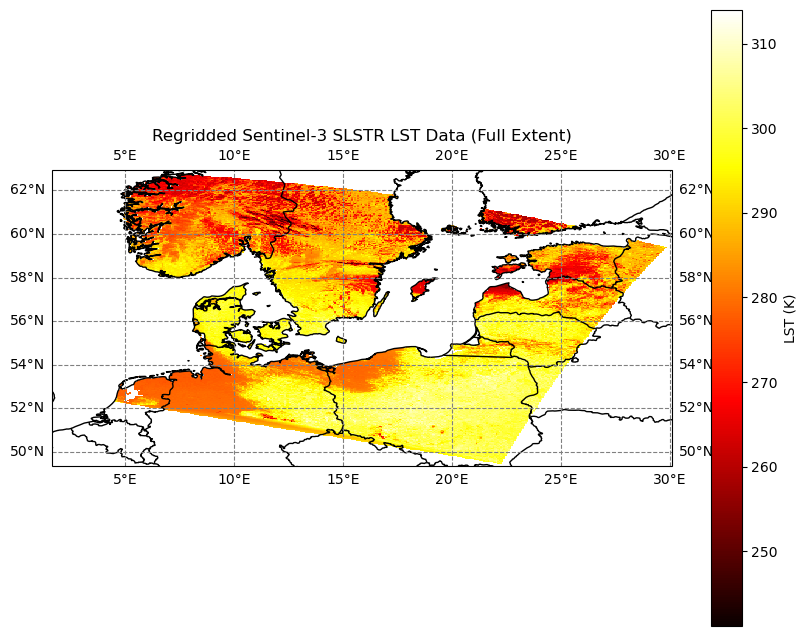

In [11]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})
mappable = ax.pcolormesh(lon_grid, lat_grid, lst_regridded, cmap="hot")
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Regridded Sentinel-3 SLSTR LST Data (Full Extent)")
ax.set_xlabel("Longitude (°E)")
ax.set_ylabel("Latitude (°N)")
plt.colorbar(mappable, ax=ax, label="LST (K)")
ax.gridlines(draw_labels=True, color="gray", linestyle="--")
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
plt.show()

In [13]:
# Compute and display statistics
print("Regridded LST Statistics:")
print(f"Mean: {np.nanmean(lst_regridded):.2f} K")
print(f"Std Dev: {np.nanstd(lst_regridded):.2f} K")

Regridded LST Statistics:
Mean: 288.46 K
Std Dev: 11.65 K


### (Optional) Plot Original Data

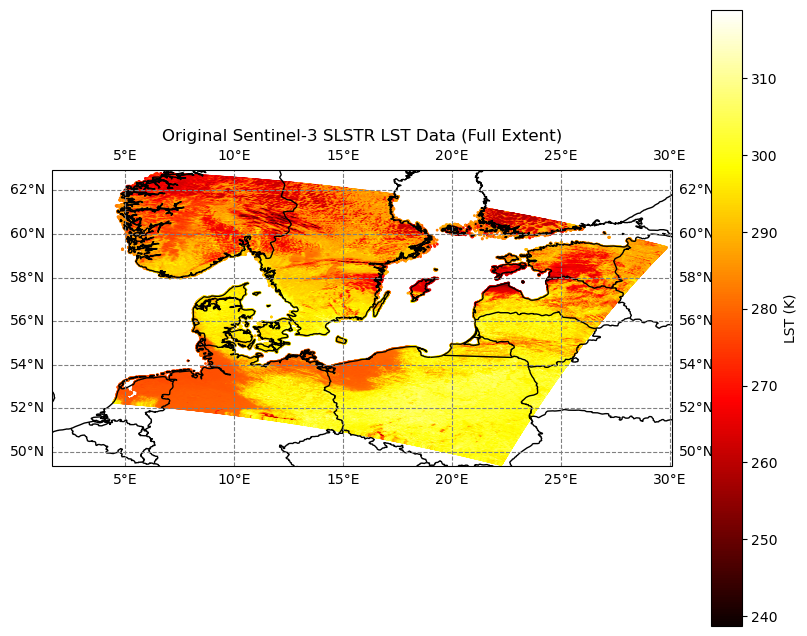

In [12]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})
scatter = ax.scatter(lon_original, lat_original, c=lst_original, cmap="hot", s=1)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Original Sentinel-3 SLSTR LST Data (Full Extent)")
ax.set_xlabel("Longitude (°E)")
ax.set_ylabel("Latitude (°N)")
plt.colorbar(scatter, ax=ax, label="LST (K)")
ax.gridlines(draw_labels=True, color="gray", linestyle="--")
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
plt.show()

In [14]:
print("Original LST Statistics:")
print(f"Mean: {np.nanmean(lst_original):.2f} K")
print(f"Std Dev: {np.nanstd(lst_original):.2f} K")

Original LST Statistics:
Mean: 288.98 K
Std Dev: 11.78 K


## Define Netherlands-specific grid (approx. 50.75–53.5°N, 3.2–7.2°E)

In [17]:
n_points_nl = 400  # Adjustable resolution for Netherlands
lat_min_nl, lat_max_nl = 50.75, 53.5
lon_min_nl, lon_max_nl = 3.2, 7.2
target_lat_nl = np.linspace(lat_min_nl, lat_max_nl, n_points_nl)
target_lon_nl = np.linspace(lon_min_nl, lon_max_nl, n_points_nl)
lon_grid_nl, lat_grid_nl = np.meshgrid(target_lon_nl, target_lat_nl)

### Regrid for Netherlands Grid

In [18]:
lst_regridded_nl = griddata(
    (lon_original.values.flatten(), lat_original.values.flatten()),
    lst_original.values.flatten(),
    (lon_grid_nl, lat_grid_nl),
    method="linear",
)

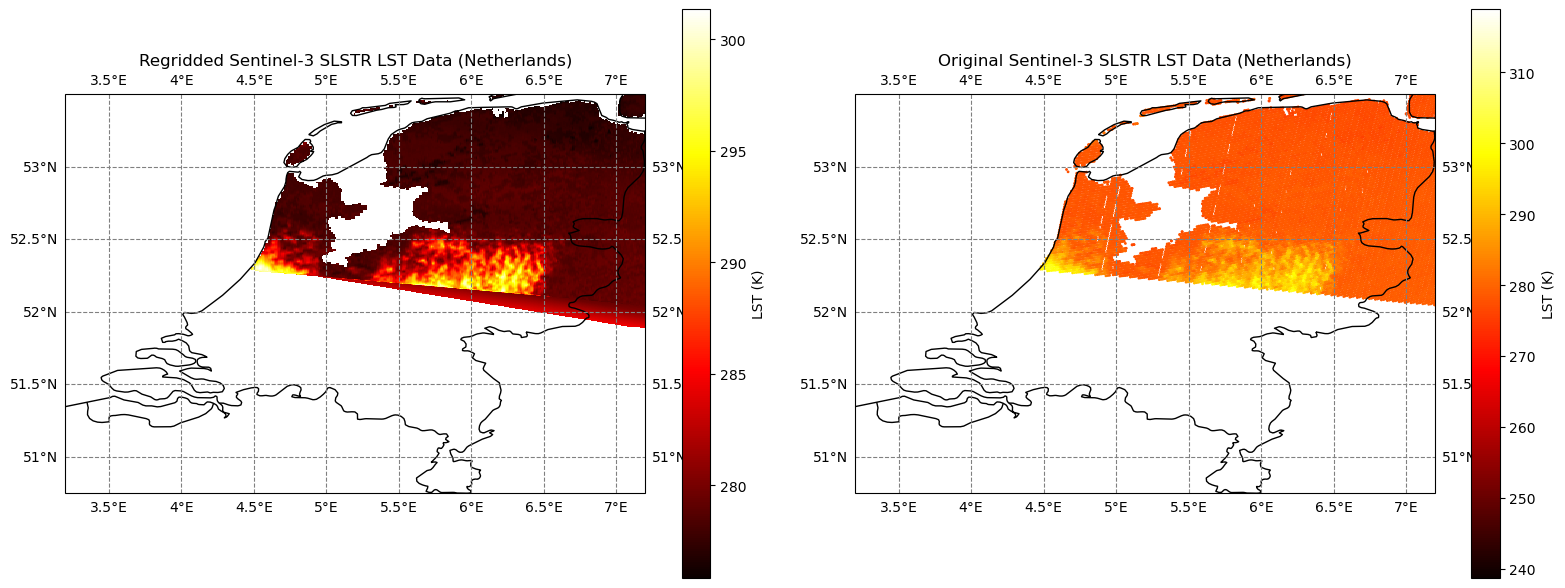

In [20]:
# 5. Visualization (Netherlands Side-by-Side)
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 6), subplot_kw={"projection": ccrs.PlateCarree()}
)

# 5.2.1 Plot Regridded Data (Netherlands)
mappable1 = ax1.pcolormesh(lon_grid_nl, lat_grid_nl, lst_regridded_nl, cmap="hot")
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)
ax1.set_title("Regridded Sentinel-3 SLSTR LST Data (Netherlands)")
ax1.set_xlabel("Longitude (°E)")
ax1.set_ylabel("Latitude (°N)")
plt.colorbar(mappable1, ax=ax1, label="LST (K)")
ax1.gridlines(draw_labels=True, color="gray", linestyle="--")
ax1.set_xlim(lon_min_nl, lon_max_nl)
ax1.set_ylim(lat_min_nl, lat_max_nl)

# 5.2.2 Plot Original Data (Netherlands)
scatter2 = ax2.scatter(lon_original, lat_original, c=lst_original, cmap="hot", s=1)
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS)
ax2.set_title("Original Sentinel-3 SLSTR LST Data (Netherlands)")
ax2.set_xlabel("Longitude (°E)")
ax2.set_ylabel("Latitude (°N)")
plt.colorbar(scatter2, ax=ax2, label="LST (K)")
ax2.gridlines(draw_labels=True, color="gray", linestyle="--")
ax2.set_xlim(lon_min_nl, lon_max_nl)
ax2.set_ylim(lat_min_nl, lat_max_nl)

plt.tight_layout()
plt.show()

# Display Statistics
### Statistics for original Netherlands data

In [22]:
# 3.2 Verify Data Extent (extended with Netherlands subset)
lat_min, lat_max = lat_original.min().item(), lat_original.max().item()
lon_min, lon_max = lon_original.min().item(), lon_original.max().item()

# Subset original data for Netherlands (50.75–53.5°N, 3.2–7.2°E)
mask_nl = (
    (lat_original >= 50.75)
    & (lat_original <= 53.5)
    & (lon_original >= 3.2)
    & (lon_original <= 7.2)
)
lst_original_nl = lst_original.where(mask_nl, drop=True)
lat_original_nl = lat_original.where(mask_nl, drop=True)
lon_original_nl = lon_original.where(mask_nl, drop=True)

In [23]:
if lst_original_nl is not None and not lst_original_nl.isnull().all():
    mean_orig_nl = lst_original_nl.mean().item()
    std_orig_nl = lst_original_nl.std().item()
else:
    mean_orig_nl = float("nan")
    std_orig_nl = float("nan")
    print("Warning: No valid data in original Netherlands subset.")

# Statistics for regridded Netherlands data
if lst_regridded_nl is not None and not np.isnan(lst_regridded_nl).all():
    mean_regridded_nl = np.nanmean(lst_regridded_nl)
    std_regridded_nl = np.nanstd(lst_regridded_nl)
else:
    mean_regridded_nl = float("nan")
    std_regridded_nl = float("nan")
    print("Warning: No valid data in regridded Netherlands data.")

print("\nNetherlands LST Statistics:")
print(f"Original Mean: {mean_orig_nl:.2f} K")
print(f"Original Std Dev: {std_orig_nl:.2f} K")
print(f"Regridded Mean: {mean_regridded_nl:.2f} K")
print(f"Regridded Std Dev: {std_regridded_nl:.2f} K")
print(f"Mean Difference: {(mean_regridded_nl - mean_orig_nl):.2f} K")
print(f"Std Dev Difference: {(std_regridded_nl - std_orig_nl):.2f} K")


Netherlands LST Statistics:
Original Mean: 279.78 K
Original Std Dev: 3.90 K
Regridded Mean: 280.01 K
Regridded Std Dev: 3.84 K
Mean Difference: 0.23 K
Std Dev Difference: -0.06 K


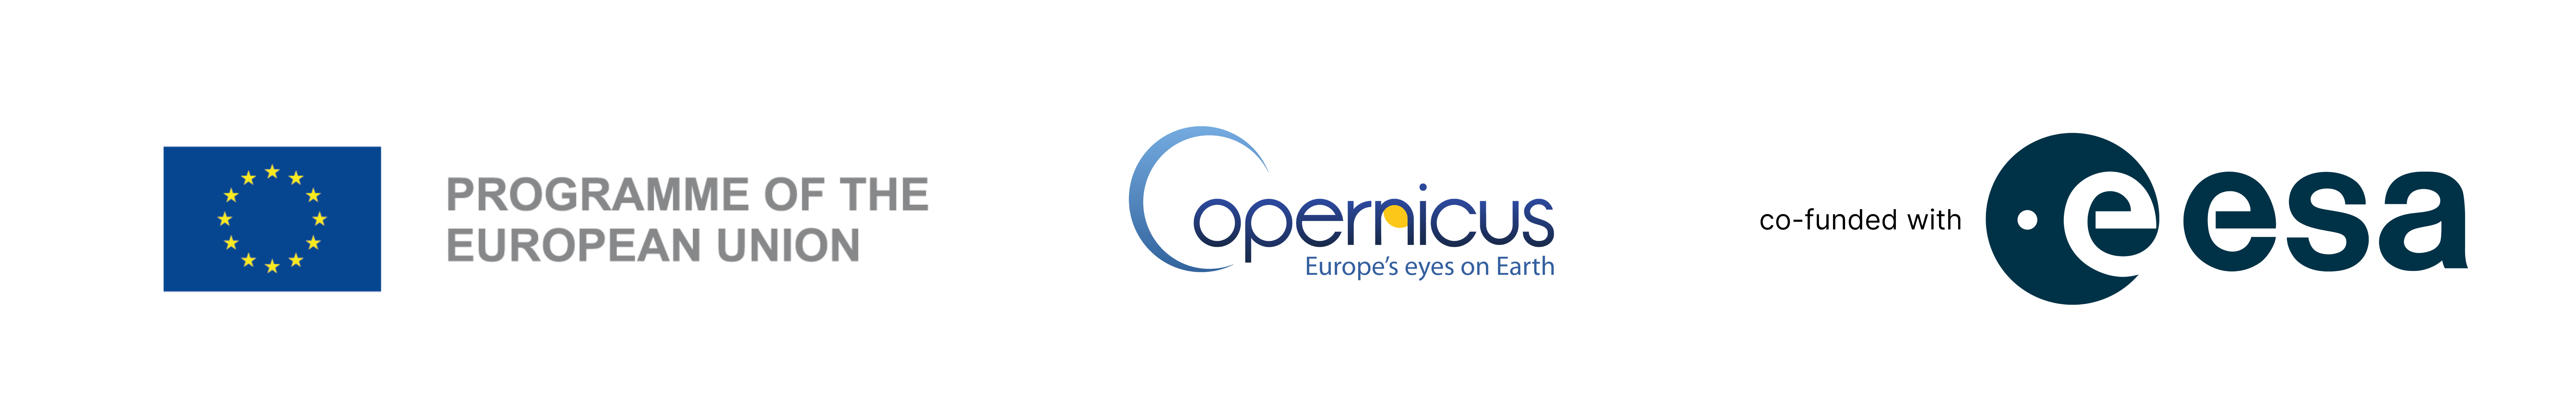